In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat as loadmat
import sigpy as sp
import sigpy.plot as pl
from utils import *

# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

Example 1

In [2]:
k_order = np.zeros((96, 4), dtype='int')
k_order[:, 2] = np.arange(-96//2, 96//2, 1) 
SEQ_NAME = ''


In [3]:
folder = './mri_artifacts_data/1.CS_EPI/'
Nkx = 96
Nky = 96
file_mpi = 'signals_CSinEPI_ex1_MPI.h5'
file_mpi_2 = 'signals_ex1_MPI_2.h5'
file_gpu = 'signals_CSinEPI_ex1_DP.h5'
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=96, Ny=96, Nkx=96, Nky=96, save=False)

ksp_gpu = ksps[0].squeeze()
ksp_mpi = ksps[2].squeeze()
print(ksp_gpu.shape, ksp_mpi.shape)

## EPI reordering
for ii in range(Nky//2):
    ksp_gpu[2*ii+1,:] = ksp_gpu[2*ii+1,::-1]
    ksp_mpi[2*ii+1,:] = ksp_mpi[2*ii+1,::-1]
    
img_gpu = np.fft.fftshift( np.fft.ifft2(np.fft.ifftshift(ksp_gpu)) ).astype(np.complex64)
img_mpi = np.fft.fftshift( np.fft.ifft2(np.fft.ifftshift(ksp_mpi)) ).astype(np.complex64)
max_val = np.max([np.abs(img_gpu), np.abs(img_mpi)])
img_gpu /= max_val
img_mpi /= max_val

Relative K-space RMSE:	0.0000752332
NRMSE (GPU vs MPI): 0.000117,	NRMSE (MPI vs MPI2): 0.000192
Relative Image-space RMSE:	0.0008263221
NRMSE (GPU vs MPI): 0.001280,	NRMSE (MPI vs MPI2): 0.002106
(96, 96) (96, 96)


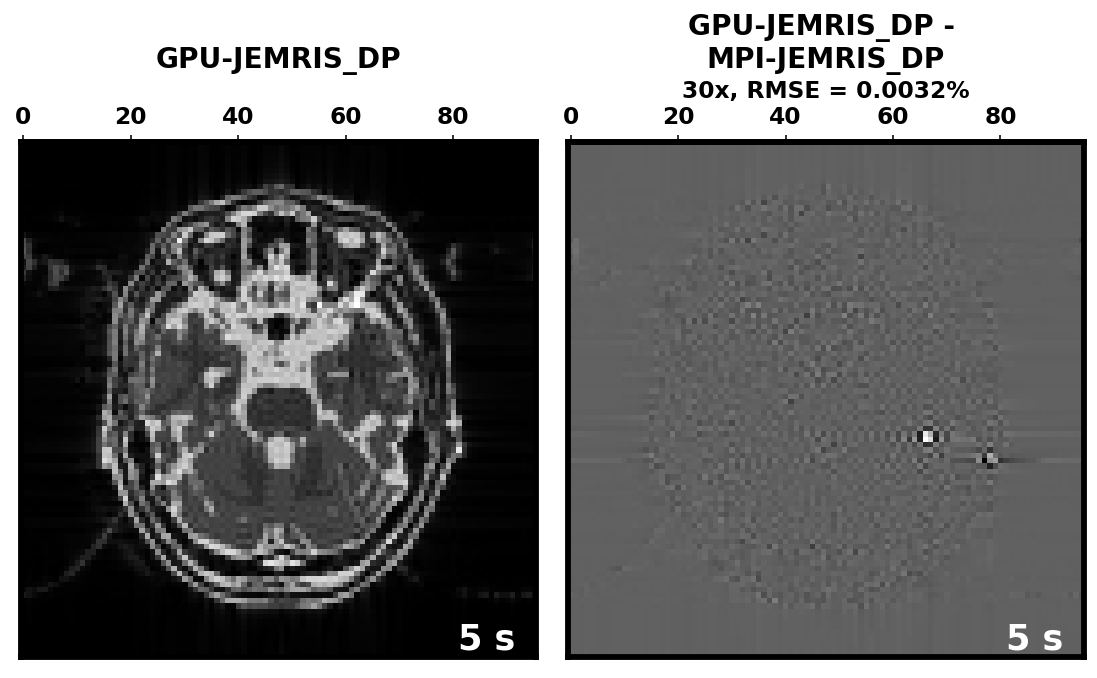

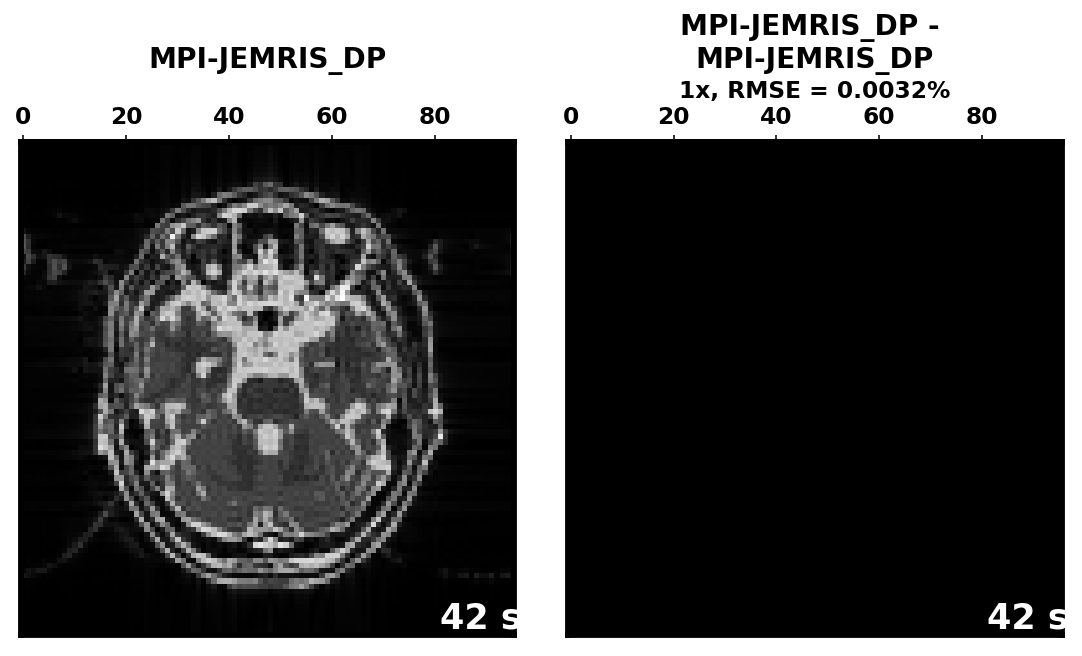

In [4]:
plot_image_magnitude(image=img_gpu.T, ground_truth=img_mpi.T, intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0032", title_suffix="GPU-JEMRIS_DP", 
                     filename_suffix="_GDP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=30, simulation_time='5 s')

plot_image_magnitude(image=img_mpi.T, ground_truth=img_mpi.T, intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0032", title_suffix="MPI-JEMRIS_DP", 
                     filename_suffix="_MPI-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=1, simulation_time='42 s')

In [5]:
# single precision GPU-JEMRIS vs MPI-JEMRIS
folder = './mri_artifacts_data/1.CS_EPI/'
Nkx = 96
Nky = 96
file_mpi = 'signals_CSinEPI_ex1_MPI.h5'
file_mpi_2 = 'signals_ex1_MPI_2.h5'
file_gpu = 'signals_CSinEPI_ex1_SP.h5'
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=96, Ny=96, Nkx=96, Nky=96, save=False)

ksp_gpu = ksps[0].squeeze()
ksp_mpi = ksps[1].squeeze()
## EPI reordering
for ii in range(Nky//2):
    ksp_gpu[2*ii+1,:] = ksp_gpu[2*ii+1,::-1]
    ksp_mpi[2*ii+1,:] = ksp_mpi[2*ii+1,::-1]
    
img_gpu = np.fft.fftshift( np.fft.ifft2(np.fft.ifftshift(ksp_gpu)) ).astype(np.complex64)
img_mpi = np.fft.fftshift( np.fft.ifft2(np.fft.ifftshift(ksp_mpi)) ).astype(np.complex64)
max_val = np.max([np.abs(img_gpu), np.abs(img_mpi)])
img_gpu /= max_val
img_mpi /= max_val

Relative K-space RMSE:	0.0002361109
NRMSE (GPU vs MPI): 0.000428,	NRMSE (MPI vs MPI2): 0.000192
Relative Image-space RMSE:	0.0026141901
NRMSE (GPU vs MPI): 0.004720,	NRMSE (MPI vs MPI2): 0.002106


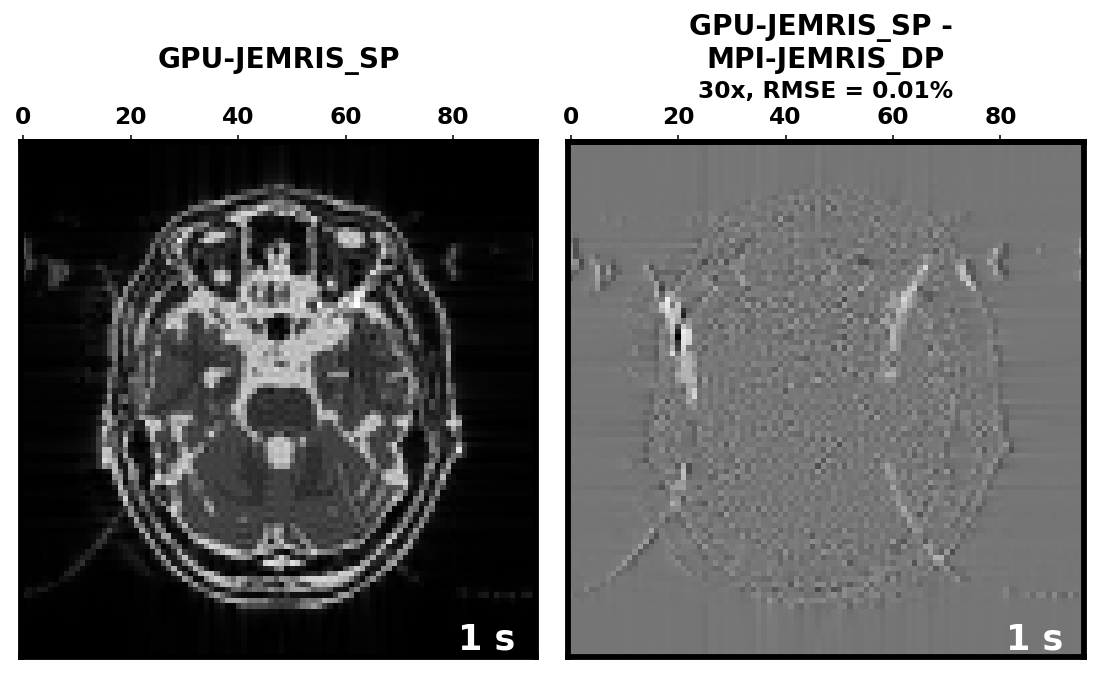

In [6]:
plot_image_magnitude(image=img_gpu.T, ground_truth=img_mpi.T, intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.01", title_suffix="GPU-JEMRIS_SP", 
                     filename_suffix="_GSP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=30, simulation_time='1 s')

### Example 3

Relative K-space RMSE:	0.0001398395
NRMSE (GPU vs MPI): 0.007228,	NRMSE (MPI vs MPI2): 0.007368
Relative Image-space RMSE:	0.0006612167
NRMSE (GPU vs MPI): 0.047346,	NRMSE (MPI vs MPI2): 0.046684


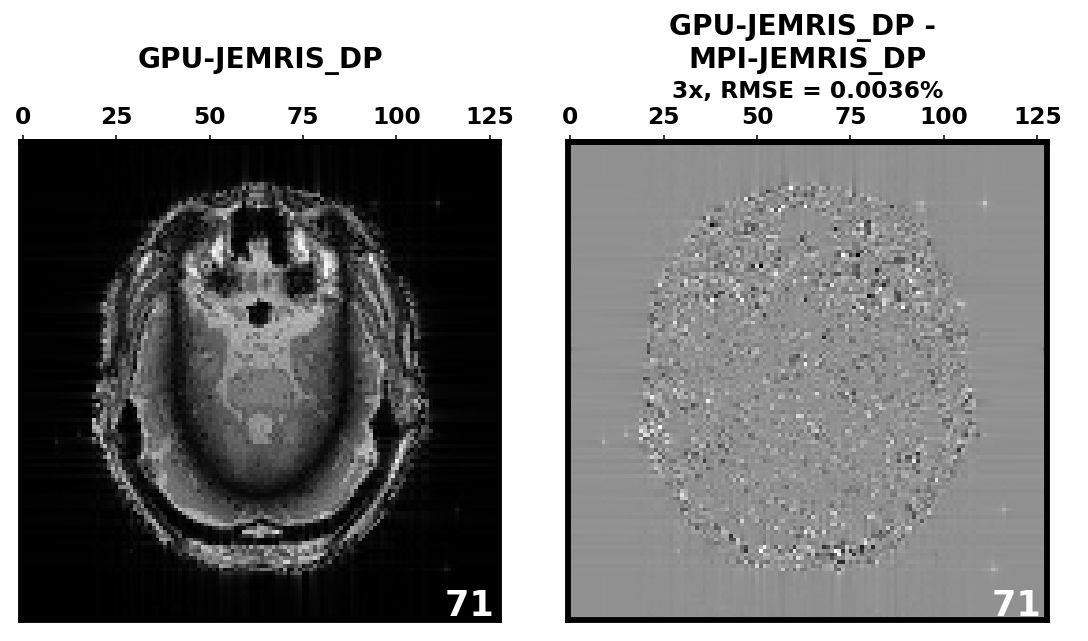

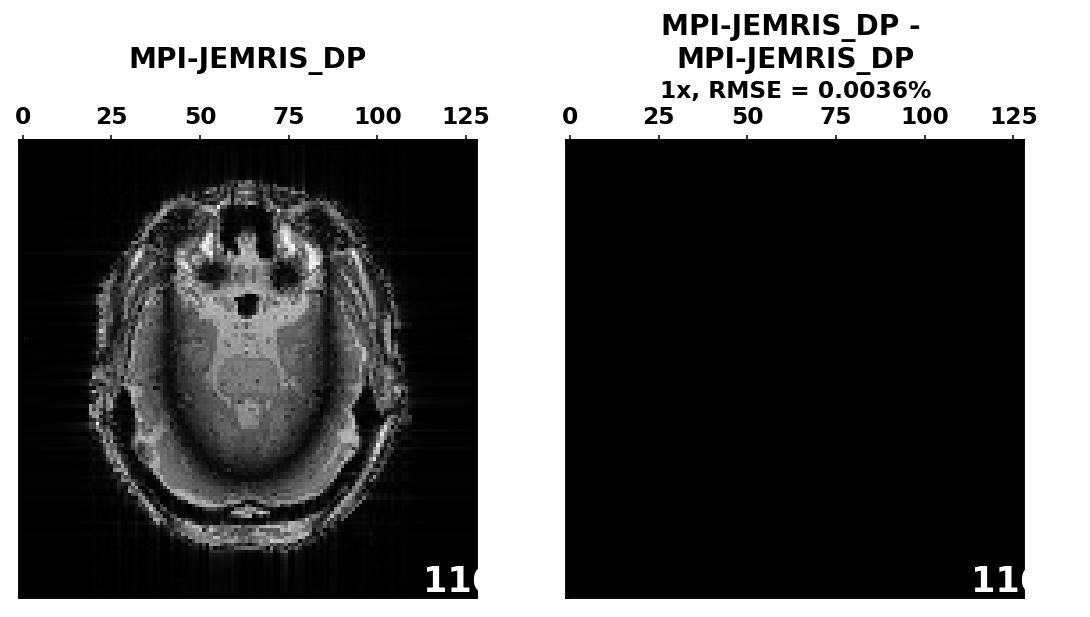

In [7]:
folder = './mri_artifacts_data/3.trueFISP_band/'
N = 128
file_mpi = 'signals_ex3_mpi.h5'
file_mpi_2 = 'signals_ex3_MPI_2.h5'
file_gpu = 'signals_ex3_gpu.h5'

k_order = np.zeros((N, 4), dtype='int')
k_order[:, 2] = np.arange(-N//2, N//2, 1) 
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=N, Ny=N, Nkx=N, Nky=N, save=False)

normalize_all(imgs, imgs[0])

plot_image_magnitude(image=imgs[0][0], ground_truth=imgs[1][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0036", title_suffix="GPU-JEMRIS_DP", 
                     filename_suffix="_GDP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=3, simulation_time='71 s')
plot_image_magnitude(image=imgs[1][0], ground_truth=imgs[1][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0036", title_suffix="MPI-JEMRIS_DP", 
                     filename_suffix="_MPI-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=1, simulation_time='116 s')

Relative K-space RMSE:	0.0003058896
NRMSE (GPU vs MPI): 0.007062,	NRMSE (MPI vs MPI2): 0.007368
Relative Image-space RMSE:	0.0009002164
NRMSE (GPU vs MPI): 0.047585,	NRMSE (MPI vs MPI2): 0.046684


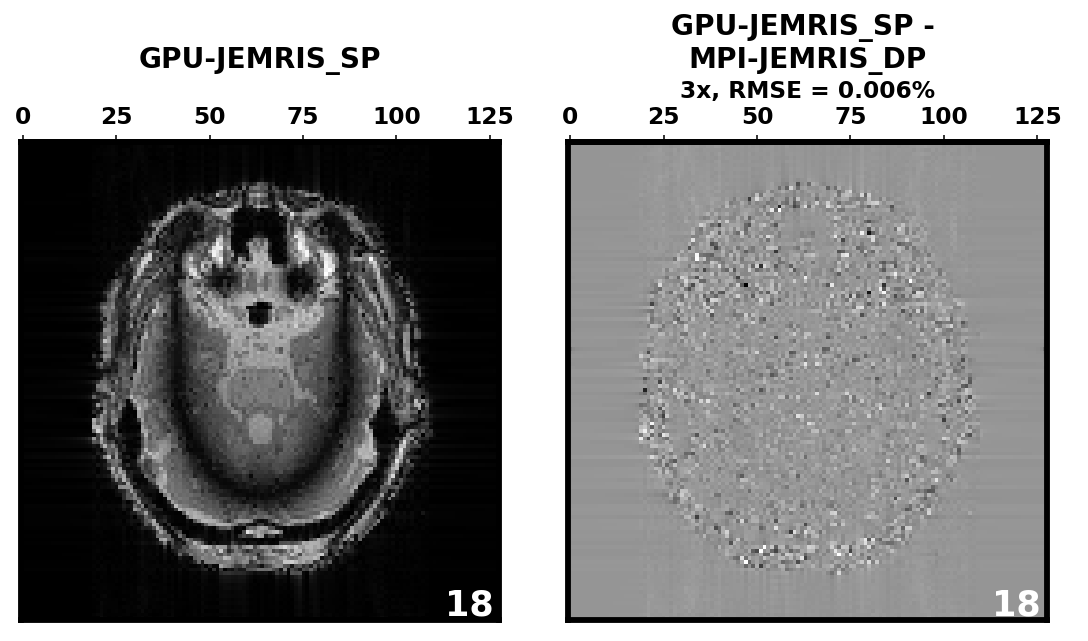

In [8]:
folder = './mri_artifacts_data/3.trueFISP_band/'
file_mpi = 'signals_ex3_mpi.h5'
file_mpi_2 = 'signals_ex3_MPI_2.h5'
file_gpu = 'signals_ex3_gpuSP_2.h5'
N = 128

k_order = np.zeros((N, 4), dtype='int')
k_order[:, 2] = np.arange(-N//2, N//2, 1) 
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=N, Ny=N, Nkx=N, Nky=N, save=False)

normalize_all(imgs, imgs[0])

plot_image_magnitude(image=imgs[0][0], ground_truth=imgs[1][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.006", title_suffix="GPU-JEMRIS_SP", 
                     filename_suffix="_GSP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=3, simulation_time='18 s')

### Example 4

Relative K-space RMSE:	0.0000090851
NRMSE (GPU vs MPI): 0.001517,	NRMSE (MPI vs MPI2): 0.001526
Relative Image-space RMSE:	0.0004934147
NRMSE (GPU vs MPI): 0.019260,	NRMSE (MPI vs MPI2): 0.019753


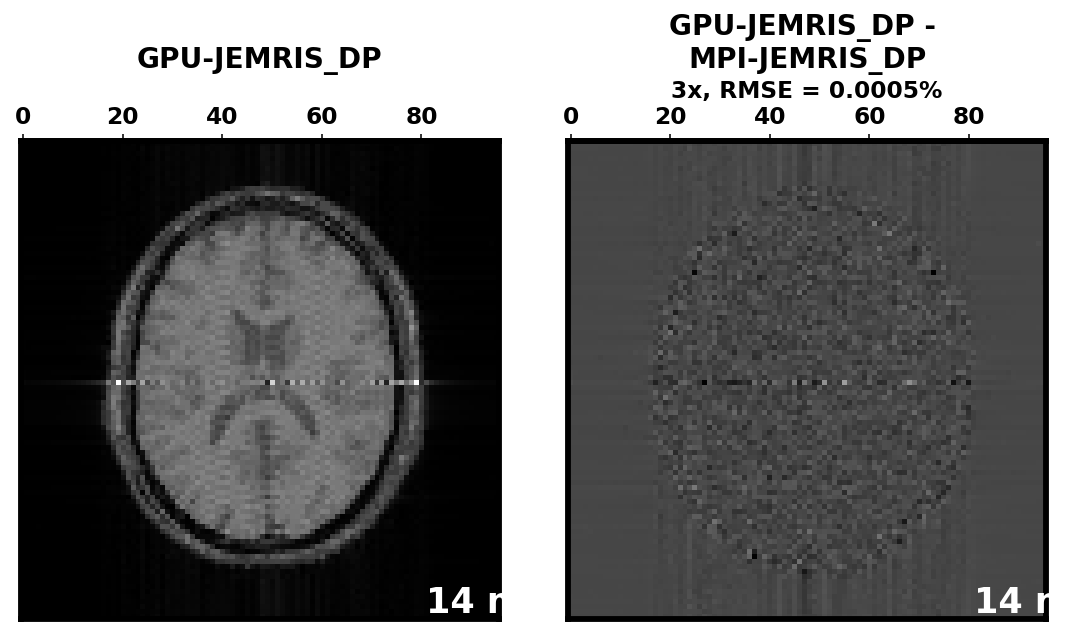

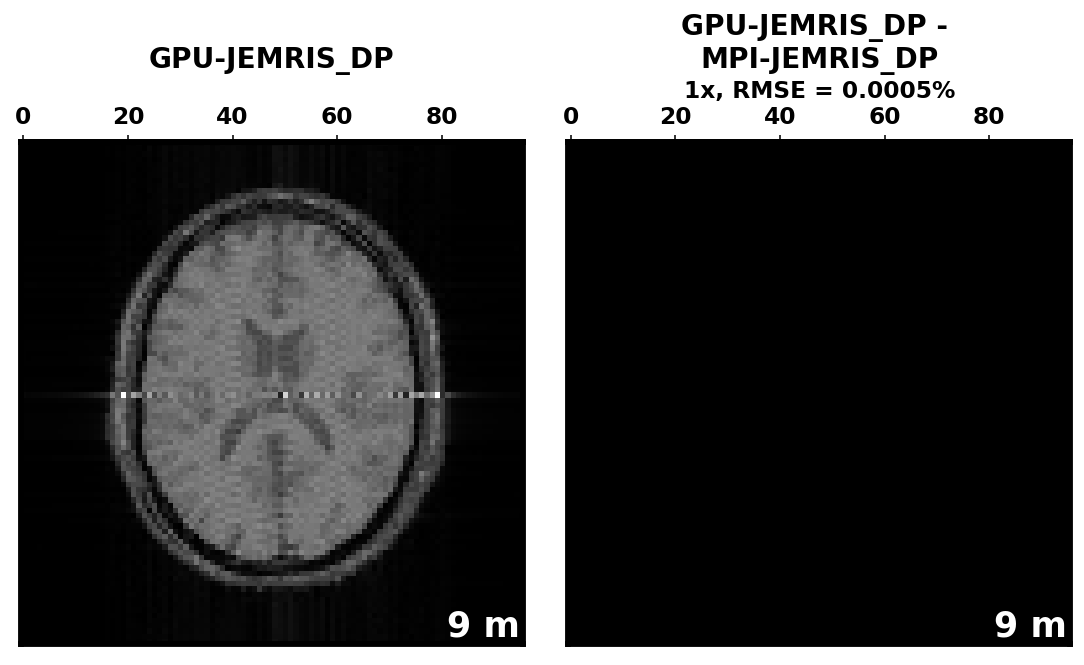

In [9]:
folder = './mri_artifacts_data/4.SE_longRefoc/'
file_mpi = 'signals_ex4_mpi.h5'
file_mpi_2 = 'signals_ex4_MPI_2.h5'
file_gpu = 'signals_ex4_gpuDP.h5'
N = 96

k_order = np.zeros((N, 4), dtype='int')
k_order[:, 2] = np.arange(-N//2, N//2, 1) 
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=N, Ny=N, Nkx=N, Nky=N, save=False)
normalize_all(imgs, imgs[0])

plot_image_magnitude(image=imgs[0][0], ground_truth=imgs[1][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0005", title_suffix="GPU-JEMRIS_DP", 
                     filename_suffix="_GDP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=3, simulation_time='14 m')
plot_image_magnitude(image=imgs[0][0], ground_truth=imgs[0][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.0005", title_suffix="GPU-JEMRIS_DP", 
                     filename_suffix="_MPI-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=1, simulation_time='9 m')

Relative K-space RMSE:	0.0000492559
NRMSE (GPU vs MPI): 0.001575,	NRMSE (MPI vs MPI2): 0.001526
Relative Image-space RMSE:	0.0000703167
NRMSE (GPU vs MPI): 0.019683,	NRMSE (MPI vs MPI2): 0.019753


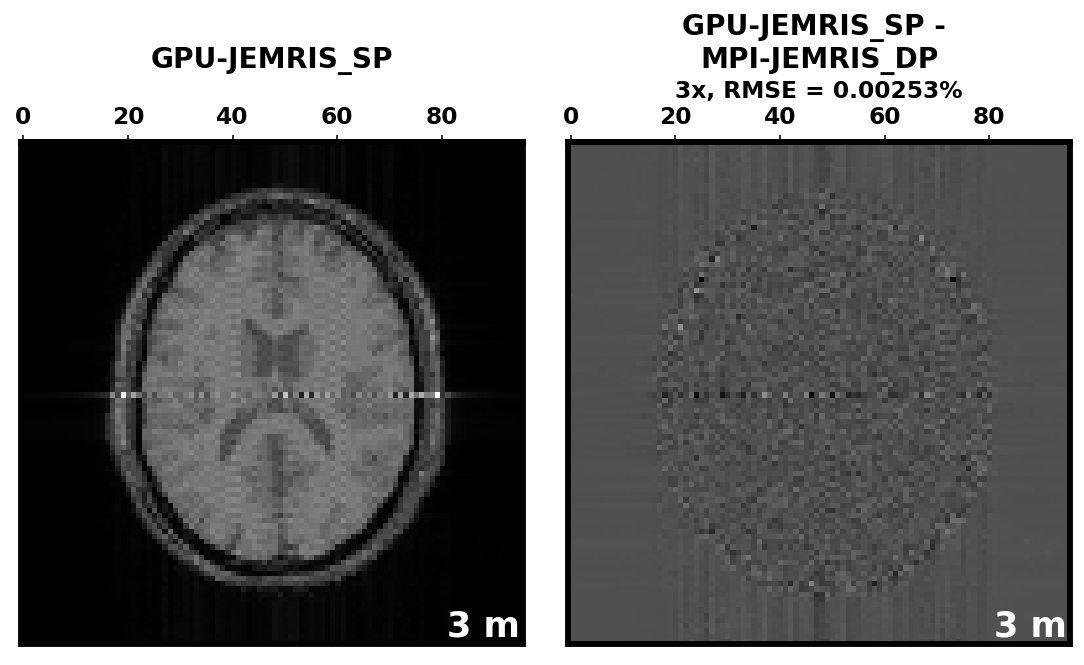

In [10]:
folder = './mri_artifacts_data/4.SE_longRefoc/'
file_mpi = 'signals_ex4_mpi.h5'
file_mpi_2 = 'signals_ex4_MPI_2.h5'
file_gpu = 'signals_ex4_gpuSP_2.h5'
N = 96

k_order = np.zeros((N, 4), dtype='int')
k_order[:, 2] = np.arange(-N//2, N//2, 1) 
ksps, imgs = compare_ksp_img(file_gpu, file_mpi, file_mpi_2, k_order, folder, n_channels=1, \
        Nx=N, Ny=N, Nkx=N, Nky=N, save=False)
normalize_all(imgs, imgs[0])

plot_image_magnitude(image=imgs[0][0], ground_truth=imgs[1][0], intensity_scale='abs', 
                     magnitude_threshold=1e-10, nrmse_value="0.00253", title_suffix="GPU-JEMRIS_SP", 
                     filename_suffix="_GSP-MPI_N2M_time_", save_plot=False, output_folder="./", 
                     difference_scale=3, simulation_time='3 m')